In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CoronaryHeartDisease.csv')
print(df.head())  # Shows first few rows

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

 **1. Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

 **2. BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

**3. Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

 **4. TenYearCHD**: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

 **5. Education**: level of formal education a person has completed.(1->Some High School, 2->Some High School Graduate, 4->College Graduate, etc..)

In [4]:
# Check for null values
print(df.isnull().sum())  # Shows total missing values per column

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [6]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CoronaryHeartDisease.csv')
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [8]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [10]:
df.drop(columns=['education'], inplace=True)

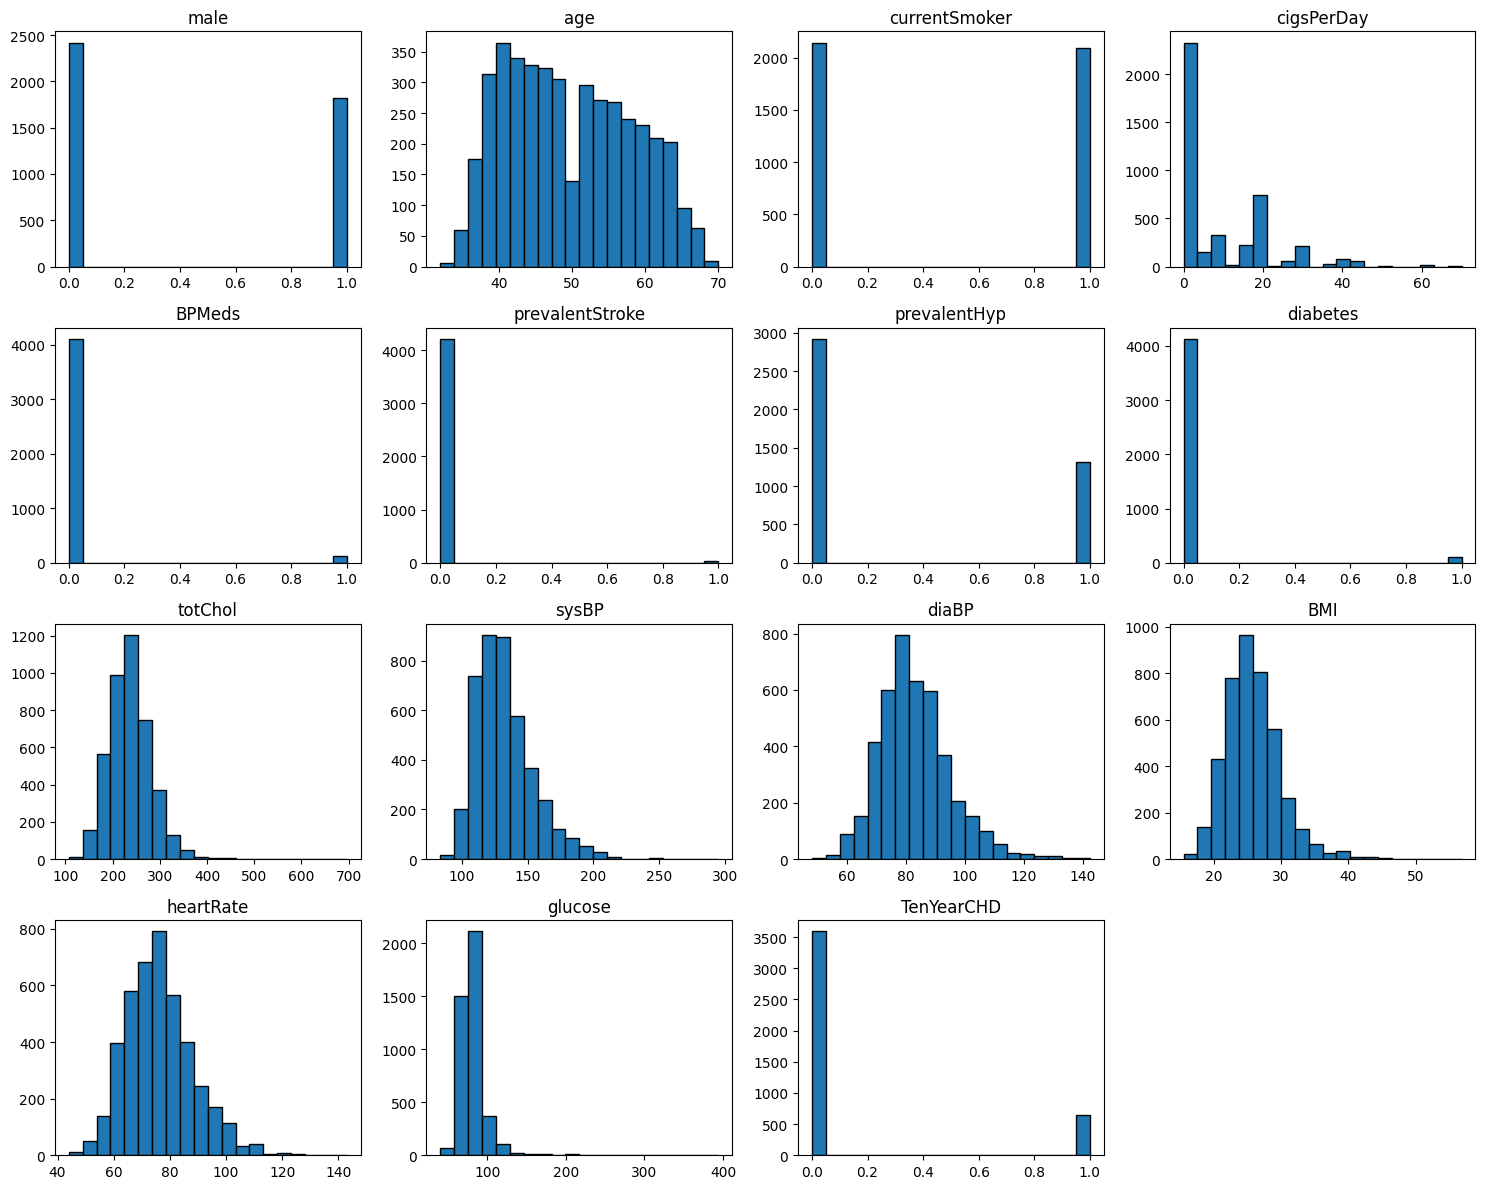

In [11]:
# Set up the plot grid
df.hist(figsize=(15, 12), bins=20, edgecolor='black', grid=False)

plt.tight_layout()
plt.show()

In [13]:
# Step 1: Create a copy of the original DataFrame
df_copy = df.copy()

# Step 2: Define feature and target
X = df_copy.drop(columns=['TenYearCHD'])  # Replace with your actual target column
y = df_copy['TenYearCHD']

# Step 3: Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Original dataset size: {df.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Original dataset size: 4238
Training set size: 2966
Testing set size: 1272


In [14]:
# Updated list of numeric columns to normalize
numeric_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'glucose', 'heartRate', 'sysBP', 'diaBP']

# Compute training mean and std
train_mean = X_train[numeric_cols].mean()
train_std = X_train[numeric_cols].std()

# Normalize training data
X_train[numeric_cols] = (X_train[numeric_cols] - train_mean) / train_std

# Normalize test data using training stats
X_test[numeric_cols] = (X_test[numeric_cols] - train_mean) / train_std

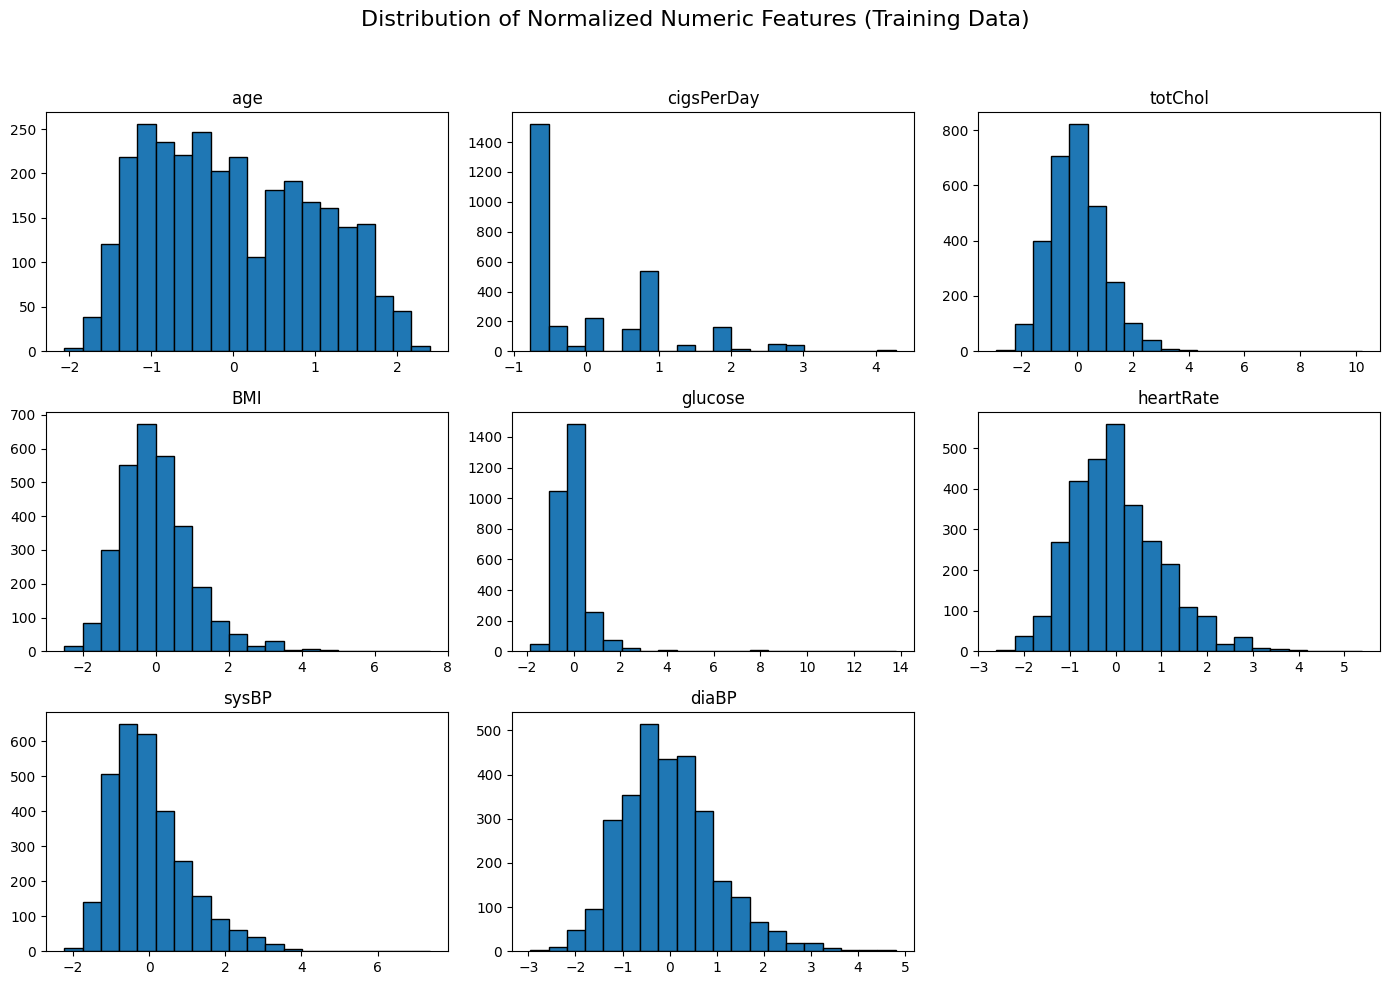

In [15]:
# List of normalized columns
normalized_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'glucose', 'heartRate', 'sysBP', 'diaBP']

# Plot histograms
X_train[normalized_cols].hist(figsize=(14, 10), bins=20, edgecolor='black', grid=False)

plt.suptitle("Distribution of Normalized Numeric Features (Training Data)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

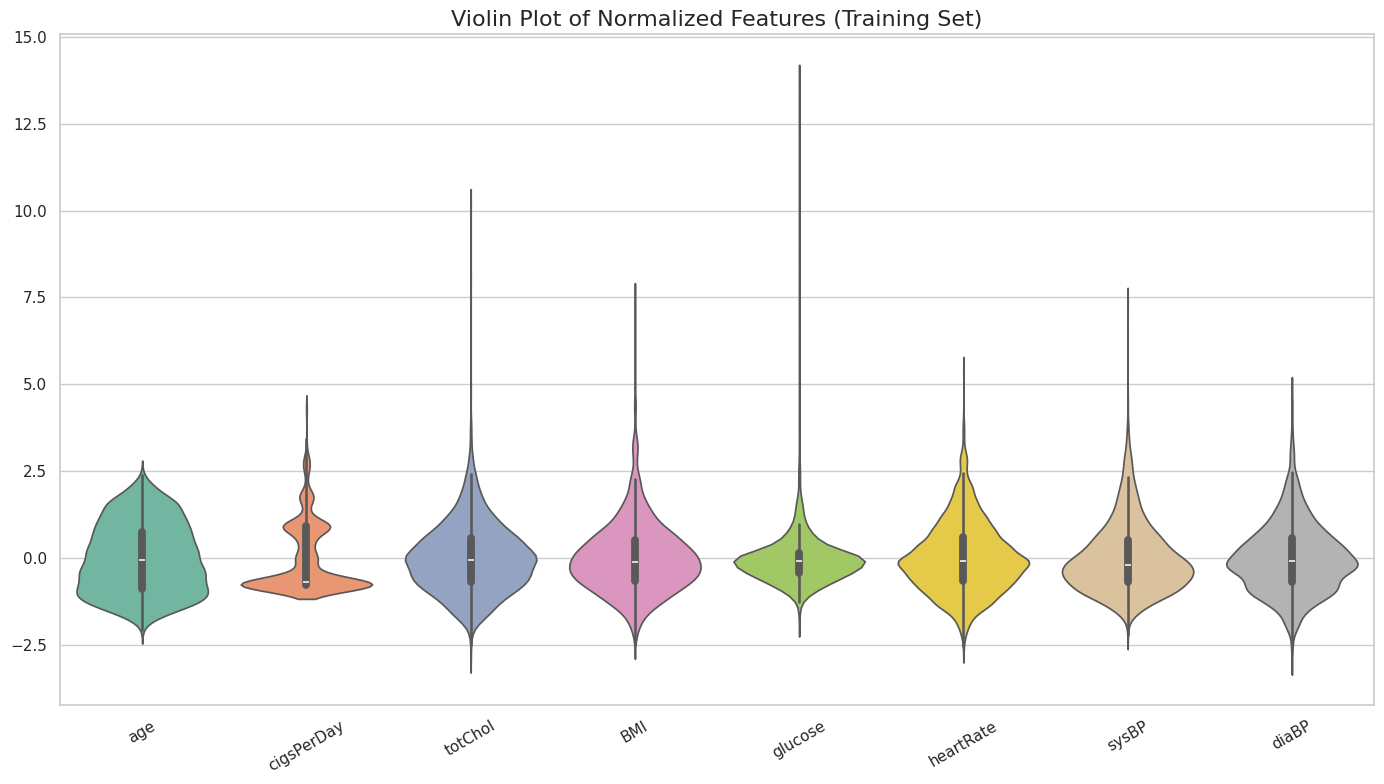

In [20]:

# Set the plotting style
sns.set(style='whitegrid')

# Plot violins
plt.figure(figsize=(14, 8))
sns.violinplot(data=X_train[normalized_cols], palette="Set2", inner="box", density_norm='width')
plt.title("Violin Plot of Normalized Features (Training Set)", fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


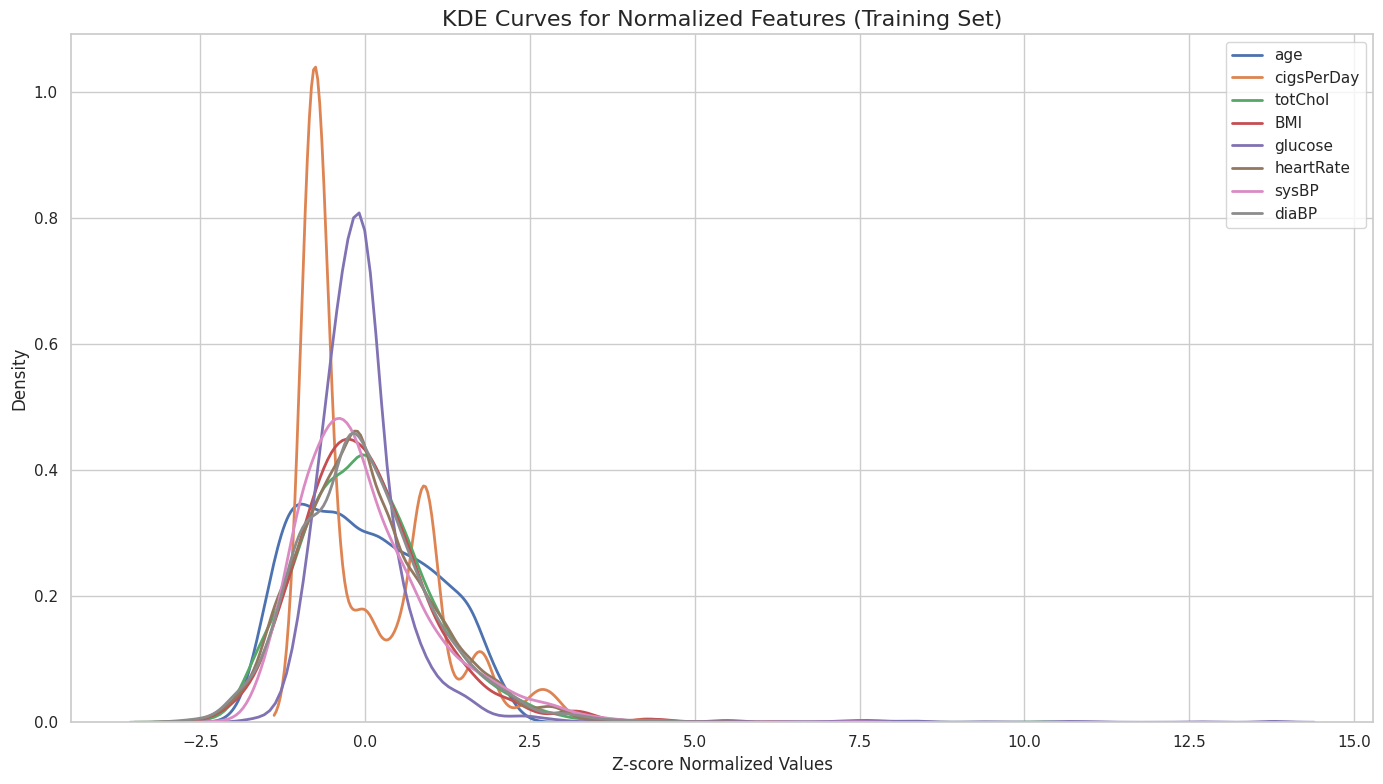

In [21]:
# Plot KDE for each normalized feature
plt.figure(figsize=(14, 8))

for col in normalized_cols:
    sns.kdeplot(data=X_train, x=col, label=col, linewidth=2)

plt.title("KDE Curves for Normalized Features (Training Set)", fontsize=16)
plt.xlabel("Z-score Normalized Values")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

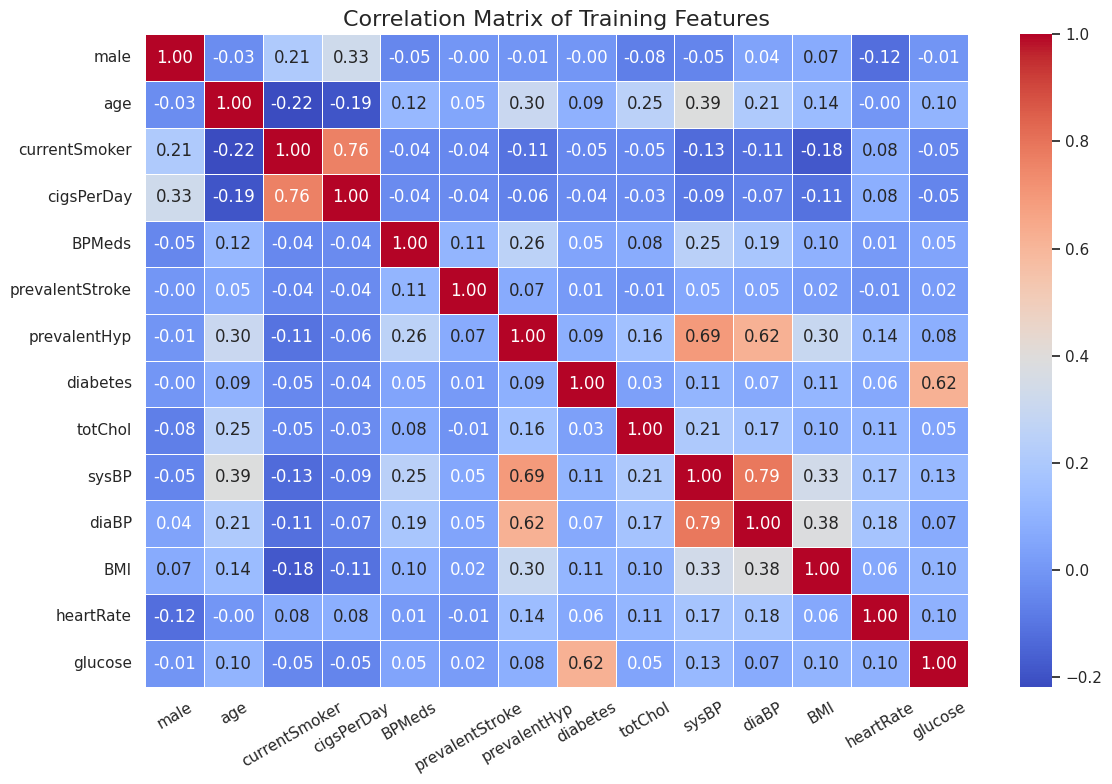

In [23]:
# Compute correlation matrix on selected features
correlation_matrix = X_train.corr()

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Training Features", fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [24]:
print(X_train[['sysBP', 'diaBP']].corrwith(y_train))

sysBP    0.211830
diaBP    0.150179
dtype: float64


In [25]:
# Drop diaBP and currentSmoker from training and testing sets
X_train.drop(columns=['diaBP', 'currentSmoker'], inplace=True)
X_test.drop(columns=['diaBP', 'currentSmoker'], inplace=True)
print(X_train.columns)

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


In [26]:
print(f"Number of columns in training data: {X_train.shape[1]}")

Number of columns in training data: 12


In [27]:
def predict_sigmoid(w, b, x):
    """
    Computes sigmoid: 1 / (1 + exp(-(w·x + b)))

    Parameters:
        w : numpy array of shape (n_features,)
        b : float (bias)
        x : numpy array of shape (n_features,)

    Returns:
        Probability (float): Sigmoid output between 0 and 1
    """
    z = np.dot(w, x) + b
    return 1 / (1 + np.exp(-z))


In [28]:
#initialise the parameters
w = np.zeros(X_train.shape[1])
b=0

In [29]:
def compute_loss(w, b, x, y):
    """
    Computes binary cross-entropy loss for a single training example.

    Parameters:
        w : numpy array of shape (n_features,)
        b : float
        x : numpy array of shape (n_features,)
        y : int (0 or 1)

    Returns:
        loss : float
    """
    p = predict_sigmoid(w, b, x)
    loss = (-y) * np.log(p) - (1 - y) * np.log(1 - p)
    return loss

In [30]:
def compute_total_loss(w, b, X_train, y_train, lambda_reg=0.01):
    """
    Computes total logistic loss with L2 regularization.

    Parameters:
        w : numpy array of shape (n_features,)
        b : float
        X_train : numpy array or DataFrame
        y_train : numpy array or Series
        lambda_reg : regularization strength

    Returns:
        total_loss : float
    """
    total_loss = 0.0
    for x, y in zip(X_train.values, y_train.values):
        total_loss += compute_loss(w, b, x, y)

    # L2 regularization term (excluding bias)
    l2_penalty = lambda_reg * np.sum(w ** 2)

    return (1/(2*len(X_train)))*(total_loss + l2_penalty)

In [32]:
def compute_gradients(w, b, X_train, y_train, lambda_reg=0.01):
    """
    Computes gradients with L2 regularization.

    Parameters:
        w : numpy array of shape (n_features,)
        b : float
        X_train : DataFrame or numpy array
        y_train : Series or numpy array
        lambda_reg : float (L2 regularization strength)

    Returns:
        dj_dw : numpy array (gradient of weights)
        dj_db : float (gradient of bias)
    """
    m = X_train.shape[0]
    n = X_train.shape[1]

    dj_dw = np.zeros(n)
    dj_db = 0.0

    for x, y in zip(X_train.values, y_train.values):
        prediction = predict_sigmoid(w, b, x)
        error = prediction - y

        dj_dw += error * x
        dj_db += error

    # Average gradients
    dj_dw /= m
    dj_db /= m

    # Add L2 regularization gradient (not applied to bias)
    dj_dw += (lambda_reg / m) * w

    return dj_dw, dj_db


In [35]:
def train_logistic_regression(X_train, y_train, alpha=0.01, lambda_reg=0.01, tolerance=1e-6, max_iters=10000):
    """
    Trains logistic regression using gradient descent with L2 regularization.

    Returns:
        w : learned weight vector
        b : learned bias
        loss_log : list of total loss values per iteration
    """
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0.0
    loss_log = []

    # Initial total loss
    prev_loss = compute_total_loss(w, b, X_train, y_train)
    loss_log.append(prev_loss)

    for iteration in range(max_iters):
        # Compute gradients
        dj_dw, dj_db = compute_gradients(w, b, X_train, y_train)

        # Gradient descent update
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute new total loss
        current_loss = compute_total_loss(w, b, X_train, y_train)
        loss_log.append(current_loss)

        # Convergence check
        if abs(prev_loss - current_loss) < tolerance:
            print(f"Converged at iteration {iteration}")
            break

        prev_loss = current_loss

    return w, b, loss_log


In [36]:
w_final, b_final, loss_history = train_logistic_regression(X_train, y_train)

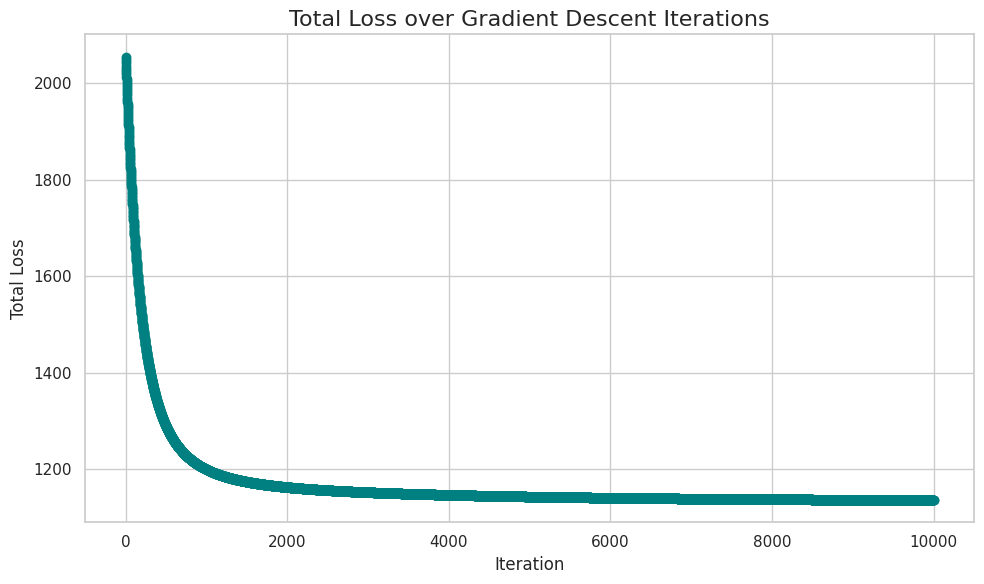

In [37]:
def plot_loss_curve(loss_log):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(loss_log)), loss_log, marker='o', color='teal', linewidth=2)
    plt.title("Total Loss over Gradient Descent Iterations", fontsize=16)
    plt.xlabel("Iteration")
    plt.ylabel("Total Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_loss_curve(loss_history)

In [38]:
# Compute z = w · x + b for each test record
z = np.dot(X_test.values, w_final) + b_final

# Apply threshold: if z <= 0 → class 0, else class 1
y_pred = np.where(z <= 0, 0, 1)


In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8577044025157232
Confusion Matrix:
 [[1075    9]
 [ 172   16]]
